##Problem Statement

**MNIST ("Modified National Institute of Standards and Technology")** is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this demo, your goal is to correctly identify digits from a dataset of thousands of handwritten images. 

####**Tasks to be Performed**

In this tutorial you will be performing the following tasks:
- Prepare the dataset for the model
- Install Tensorflow 2.x
- Develop Single Layer Perceptron model for classifying the handwritten digits
- Plot the change in accuracy per epochs
- Evaluate the model on the testing data
- Analyse the model summary
- Add hidden layer to the model to make it Multi-Layer Perceptron
- Add Dropout to prevent overfitting and check its effect on accuracy
- Increasing the number of Hidden Layer neuron and check its effect on accuracy
- Use different optimizers and check its effect on accuracy
- Increase the hidden layers and check its effect on accuracy
- Manipulate the batch_size and epochs and check its effect on accuracy
- Answer: What parameters should be choosen to get best accuracy on classifying the handwritten digits?

####**Dataset Description**


The **[MNIST Handwritten Digit Classification Dataset](http://yann.lecun.com/exdb/mnist/)** consists of 60,000 training images and 10,000 testing images of handwritten digits.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

![alt text](https://i.imgur.com/Su00XUA.png)



####**Skills Gained**

- TensorFlow 2.x
- Single Layer Perceptron
- Multi Layer Perceptron
- Model Improvisation

# Solution: Classifying Handwritten digits using Tensorflow 2.x

##Installing TensorFlow 2.x

In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 62.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
orbax 0.1.7 requires jax>=0.4.6, but you have jax 0.3.25 which is incompatible.
flax 0.6.8 requires jax>=0.4.2, but you have jax 0.3.25 which is incompatible.
chex 0.1.7 requires jax>=0.4.6, but you have jax 0.3.25 which is incompatible.


In [2]:
#verify the installation
import tensorflow as tf
from tensorflow import keras 

#Check tf.keras version
print(tf.keras.__version__)


2.12.0


##Preparing the Data

###Loading the Data

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) and convert the samples from integers to floating-point numbers and deal with categorical data:

In [3]:
# Loading MNIST dataset
mnist = keras.datasets.mnist 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# Data Exploration
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
X_train[1]

###Data Preprocessing

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
# X_train is 60000 rows of 28x28 values; we reshape it to # 60000 x 784. 
RESHAPED = 784 # 28x28 = 784 neurons
X_train = X_train.reshape(60000, RESHAPED) 
X_test = X_test.reshape(10000, RESHAPED) 

# Data is converted into float32 to use 32-bit precision # when training a neural network 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

# Normalizing the input to be within the range [0,1]
X_train /= 255
#intensity of each pixel is divided by 255, the maximum intensity value
X_test /= 255
print(X_train.shape[0], 'train samples') 
print(X_test.shape[0], 'test samples') 

# One-hot representation of the labels.
Y_train = tf.keras.utils.to_categorical(Y_train, 10) 
Y_test = tf.keras.utils.to_categorical(Y_test, 10)


60000 train samples
10000 test samples


## Designing the Model

###Preparing the Model 0: Single layer Perceptron

Build the `Sequential` model with 0 hidden layers. Choose an optimizer and loss function for training:

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_0 = Sequential()
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 10)
model_0.add(Dense(10,input_shape=(784,),name='dense_layer', activation='softmax')) 

In [11]:
# Compiling the model.
model_0.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# Training the model. 
training = model_0.fit(X_train, Y_train, batch_size=64, epochs=70, validation_split=0.2) 

Epoch 1/70
750/750 [==============================] - 3s 3ms/step - loss: 1.1032 - accuracy: 0.7399 - val_loss: 0.6599 - val_accuracy: 0.8559
Epoch 2/70
750/750 [==============================] - 2s 2ms/step - loss: 0.6107 - accuracy: 0.8541 - val_loss: 0.5105 - val_accuracy: 0.8780
Epoch 3/70
750/750 [==============================] - 2s 2ms/step - loss: 0.5142 - accuracy: 0.8691 - val_loss: 0.4521 - val_accuracy: 0.8853
Epoch 4/70
750/750 [==============================] - 3s 3ms/step - loss: 0.4677 - accuracy: 0.8776 - val_loss: 0.4193 - val_accuracy: 0.8913
Epoch 5/70
750/750 [==============================] - 3s 4ms/step - loss: 0.4389 - accuracy: 0.8836 - val_loss: 0.3982 - val_accuracy: 0.8957
Epoch 6/70
750/750 [==============================] - 2s 2ms/step - loss: 0.4189 - accuracy: 0.8868 - val_loss: 0.3830 - val_accuracy: 0.8980
Epoch 7/70
750/750 [==============================] - 2s 2ms/step - loss: 0.4041 - accuracy: 0.8903 - val_loss: 0.3714 - val_accuracy: 0.9003
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


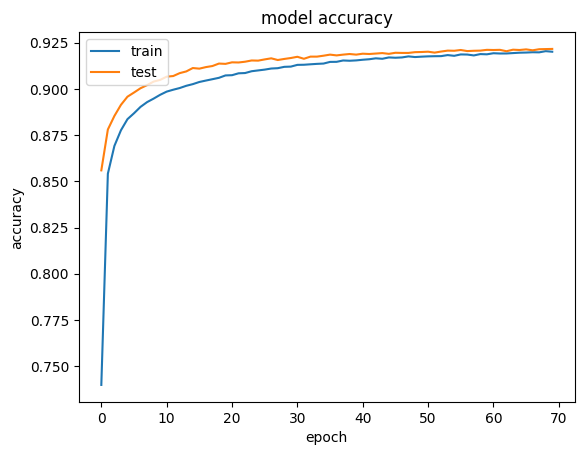

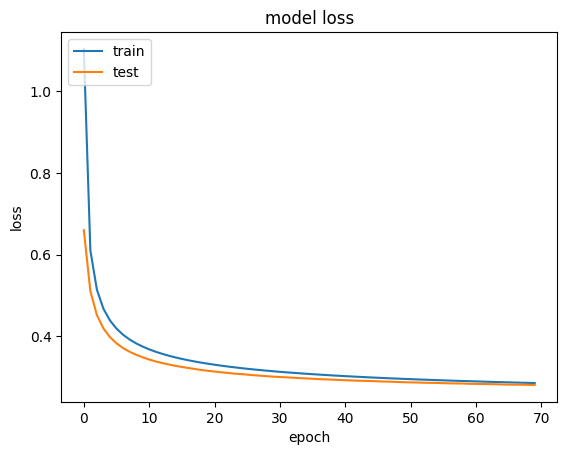

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
#evaluate the model
test_loss, test_acc = model_0.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2822 - accuracy: 0.9220
Test accuracy: 0.921999990940094


In [15]:
model_0.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f4a6ae33d30>>

In [16]:
model_0.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 10,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

In [17]:
#Most common type of model is a stack of layers
model_1 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_1.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)

# Adding another dense layer:
model_1.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
# After the first layer, you don't need to specify
# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_1.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

In [18]:
# Compiling the model.
model_1.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# Training the model. 
training = model_1.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2) 

Epoch 1/100
750/750 [==============================] - 10s 11ms/step - loss: 1.1962 - accuracy: 0.6803 - val_loss: 0.5208 - val_accuracy: 0.8676
Epoch 2/100
750/750 [==============================] - 3s 4ms/step - loss: 0.4514 - accuracy: 0.8762 - val_loss: 0.3649 - val_accuracy: 0.8972
Epoch 3/100
750/750 [==============================] - 3s 4ms/step - loss: 0.3583 - accuracy: 0.8990 - val_loss: 0.3176 - val_accuracy: 0.9104
Epoch 4/100
750/750 [==============================] - 3s 4ms/step - loss: 0.3167 - accuracy: 0.9098 - val_loss: 0.2872 - val_accuracy: 0.9172
Epoch 5/100
750/750 [==============================] - 4s 6ms/step - loss: 0.2888 - accuracy: 0.9174 - val_loss: 0.2653 - val_accuracy: 0.9249
Epoch 6/100
750/750 [==============================] - 4s 5ms/step - loss: 0.2671 - accuracy: 0.9234 - val_loss: 0.2496 - val_accuracy: 0.9280
Epoch 7/100
750/750 [==============================] - 3s 4ms/step - loss: 0.2498 - accuracy: 0.9293 - val_loss: 0.2345 - val_accuracy: 0.93

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


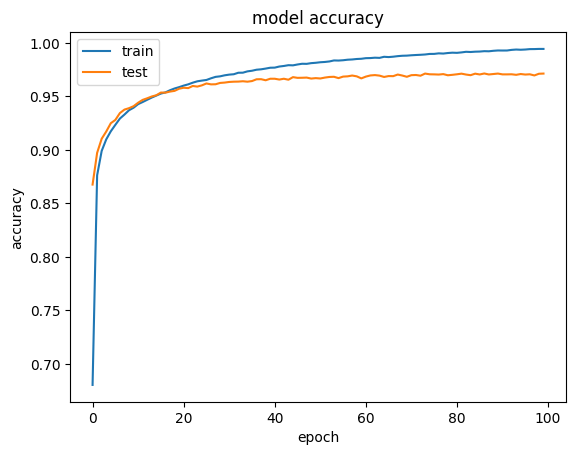

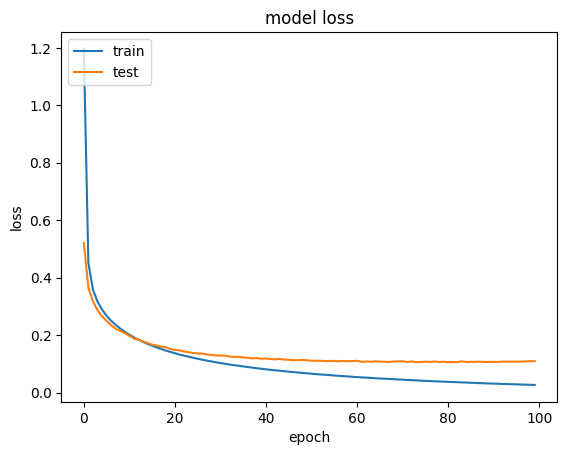

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
#evaluate the model
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0945 - accuracy: 0.9728
Test accuracy: 0.9728000164031982


In [22]:
model_1.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f4a5c308c70>>

In [23]:
model_1.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[-0.00906949,  0.08004328,  0.00011377, ...,  0.02052263,
          0.07417839,  0.05551321],
        [-0.02560977,  0.01824213, -0.01494382, ...,  0.0670056 ,
         -0.05787305,  0.00414524],
        [-0.06539962, -0.04644957, -0.07385226, ..., -0.05945513,
         -0.00115421, -0.00583109],
        ...,
        [-0.05532788,  0.07573933, -0.02704609, ..., -0.03957966,
          0.06349336,  0.06894311],
        [ 0.07966606, -0.05406792, -0.00500784, ...,  0.05002557,
         -0.04131994, -0.01824971],
        [ 0.00917061,  0.01089969,  0.07882745, ..., -0.06769845,
         -0.00711114, -0.07483359]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(64,) dtype=float32, numpy=
 array([ 0.03437105,  0.07269042, -0.08878528,  0.219762  , -0.08867657,
        -0.04403109, -0.12531252, -0.03646248,  0.13743459,  0.14803763,
         0.14761776,  0.060223  , -0.07165127, -0.04150432,  0.0908

In [24]:
model_1.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_2',
    'trainable': True,
    'dtype': 'float32',
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': No

In [25]:
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_2 = tf.keras.Sequential()
N_hidden = 128
# Adds a densely-connected layer with 64 units to the model:
model_2.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_2.add(Dropout(0.3))
# Adding another dense layer:
model_2.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_2.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_2.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [26]:
# Compiling the model.
model_2.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
# Training the model. 
training = model_2.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.2) 

Epoch 1/50
750/750 [==============================] - 5s 5ms/step - loss: 1.3692 - accuracy: 0.5637 - val_loss: 0.5678 - val_accuracy: 0.8633
Epoch 2/50
750/750 [==============================] - 4s 5ms/step - loss: 0.6659 - accuracy: 0.7974 - val_loss: 0.3766 - val_accuracy: 0.8985
Epoch 3/50
750/750 [==============================] - 5s 7ms/step - loss: 0.5170 - accuracy: 0.8476 - val_loss: 0.3171 - val_accuracy: 0.9100
Epoch 4/50
750/750 [==============================] - 4s 5ms/step - loss: 0.4479 - accuracy: 0.8676 - val_loss: 0.2805 - val_accuracy: 0.9186
Epoch 5/50
750/750 [==============================] - 4s 5ms/step - loss: 0.4038 - accuracy: 0.8795 - val_loss: 0.2590 - val_accuracy: 0.9253
Epoch 6/50
750/750 [==============================] - 5s 6ms/step - loss: 0.3720 - accuracy: 0.8914 - val_loss: 0.2385 - val_accuracy: 0.9318
Epoch 7/50
750/750 [==============================] - 4s 6ms/step - loss: 0.3456 - accuracy: 0.8997 - val_loss: 0.2245 - val_accuracy: 0.9352
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


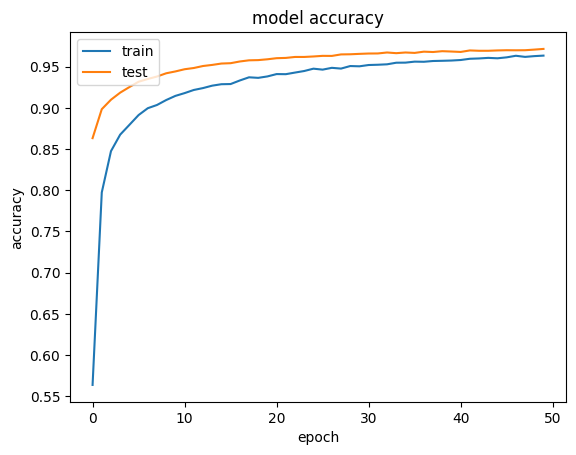

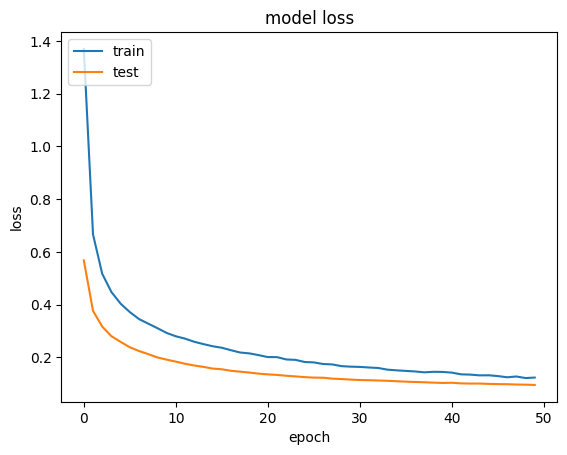

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
#evaluate the model
test_loss, test_acc = model_2.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0911 - accuracy: 0.9718
Test accuracy: 0.9718000292778015


In [30]:
model_2.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f4a5c1b6460>>

In [33]:
model_2.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[ 0.04605488, -0.02112102,  0.00544193, ..., -0.07642879,
          0.07260192, -0.04559   ],
        [ 0.05196632,  0.06247952,  0.07003414, ...,  0.02329768,
         -0.06503099, -0.07204209],
        [ 0.01138287, -0.06668022, -0.02055186, ...,  0.03970221,
         -0.0504384 , -0.00778686],
        ...,
        [-0.0334278 ,  0.06624825, -0.04107093, ..., -0.02247002,
         -0.06986634,  0.00153488],
        [ 0.01172297,  0.03990395, -0.04104179, ...,  0.07788268,
         -0.03459197, -0.02871598],
        [ 0.0017623 ,  0.04503677, -0.03395801, ..., -0.06600523,
         -0.01491153,  0.0618358 ]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(128,) dtype=float32, numpy=
 array([ 2.66164280e-02, -3.42453532e-02, -1.79961380e-02, -6.39940351e-02,
        -9.64171365e-02, -1.33526409e-02,  2.15668231e-02,  7.05638081e-02,
        -5.11569604e-02,  2.06190422e-02,  1.15383908e-01, 

In [ ]:
model_2.get_config()

In [37]:
#Most common type of model is a stack of layers
model_5 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_5.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_5.add(Dropout(0.3))
# Adding another dense layer:
model_5.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_5.add(Dropout(0.3))
# After the first layer, you don't need to specify
# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_5.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [38]:
# Compiling the model.
model_5.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
# Training the model. 
training = model_5.fit(X_train, Y_train, batch_size=64, epochs=30, validation_split=0.2) 


Epoch 1/30
750/750 [==============================] - 15s 19ms/step - loss: 0.2735 - accuracy: 0.9175 - val_loss: 0.1224 - val_accuracy: 0.9617
Epoch 2/30
750/750 [==============================] - 13s 17ms/step - loss: 0.1275 - accuracy: 0.9600 - val_loss: 0.1052 - val_accuracy: 0.9693
Epoch 3/30
750/750 [==============================] - 13s 17ms/step - loss: 0.0908 - accuracy: 0.9711 - val_loss: 0.0899 - val_accuracy: 0.9735
Epoch 4/30
750/750 [==============================] - 12s 17ms/step - loss: 0.0768 - accuracy: 0.9763 - val_loss: 0.0880 - val_accuracy: 0.9740
Epoch 5/30
750/750 [==============================] - 14s 19ms/step - loss: 0.0638 - accuracy: 0.9791 - val_loss: 0.0796 - val_accuracy: 0.9772
Epoch 6/30
750/750 [==============================] - 14s 18ms/step - loss: 0.0584 - accuracy: 0.9812 - val_loss: 0.0879 - val_accuracy: 0.9755
Epoch 7/30
750/750 [==============================] - 13s 17ms/step - loss: 0.0533 - accuracy: 0.9823 - val_loss: 0.0864 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


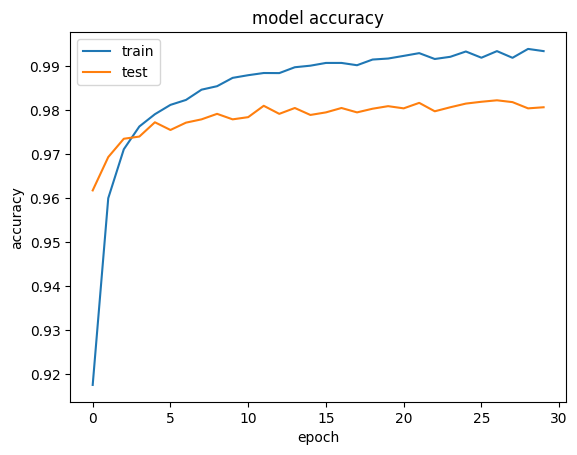

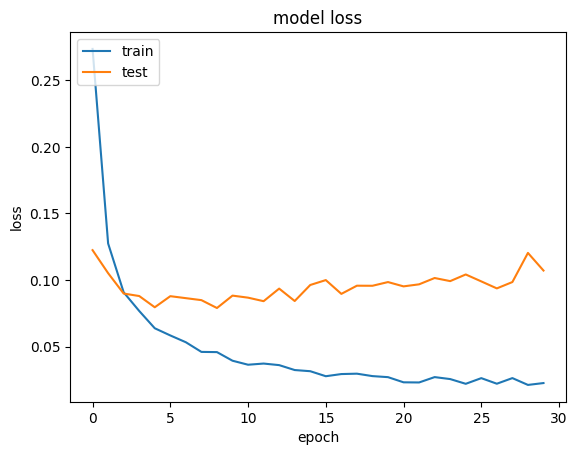

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
#evaluate the model
test_loss, test_acc = model_5.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0976 - accuracy: 0.9822
Test accuracy: 0.982200026512146


In [42]:
model_5.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f4a52b37f40>>

In [43]:
model_5.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.05848818, -0.0002225 ,  0.01433958, ..., -0.00714723,
         -0.05031628, -0.02568546],
        [ 0.0013016 , -0.02676477, -0.00036054, ..., -0.03290816,
         -0.03582861, -0.01072475],
        [-0.06274731,  0.0192112 , -0.05135819, ..., -0.04032496,
          0.04820924,  0.00807016],
        ...,
        [-0.00779768,  0.04193115, -0.02799303, ...,  0.04043949,
         -0.05747297,  0.01992285],
        [-0.00979681,  0.03859883,  0.02950186, ...,  0.01489012,
          0.01479059, -0.0140312 ],
        [-0.01461541,  0.04545809,  0.00558466, ..., -0.02114097,
         -0.04490793,  0.04327623]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(512,) dtype=float32, numpy=
 array([-2.51981299e-02, -1.16029143e-01, -1.55078530e-01, -1.25434250e-01,
         2.17723800e-03, -3.52546461e-02, -5.60789369e-02, -1.02347195e-01,
        -4.47120182e-02, -2.31257398e-02, -1.69274658e-02, 

In [44]:
model_5.get_config()

{'name': 'sequential_3',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_2',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.3,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_2',
    'trainable': True,


In [45]:
import tensorflow as tf

#In Keras, layers are assembled to build models 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_6 = tf.keras.Sequential()
N_hidden = 512

# Adds a densely-connected layer with 64 units to the model:
model_6.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_3', activation='relu'))
model_6.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_6.add(Dense(10, name='dense_layer_4', activation = 'softmax'))


In [46]:
# Compiling the model.
model_6.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
# Training the model. 
training = model_6.fit(X_train, Y_train, batch_size=64, epochs=30, validation_split=0.2) 

Epoch 1/30
750/750 [==============================] - 19s 24ms/step - loss: 0.2944 - accuracy: 0.9091 - val_loss: 0.1191 - val_accuracy: 0.9638
Epoch 2/30
750/750 [==============================] - 18s 23ms/step - loss: 0.1428 - accuracy: 0.9574 - val_loss: 0.1018 - val_accuracy: 0.9704
Epoch 3/30
750/750 [==============================] - 19s 25ms/step - loss: 0.1100 - accuracy: 0.9671 - val_loss: 0.0994 - val_accuracy: 0.9712
Epoch 4/30
750/750 [==============================] - 18s 24ms/step - loss: 0.0918 - accuracy: 0.9727 - val_loss: 0.0967 - val_accuracy: 0.9737
Epoch 5/30
750/750 [==============================] - 18s 23ms/step - loss: 0.0783 - accuracy: 0.9757 - val_loss: 0.0974 - val_accuracy: 0.9737
Epoch 6/30
750/750 [==============================] - 18s 24ms/step - loss: 0.0719 - accuracy: 0.9779 - val_loss: 0.0912 - val_accuracy: 0.9756
Epoch 7/30
750/750 [==============================] - 18s 24ms/step - loss: 0.0662 - accuracy: 0.9795 - val_loss: 0.0942 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


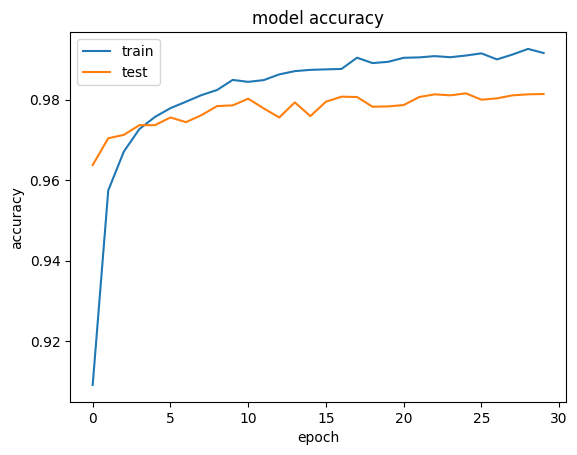

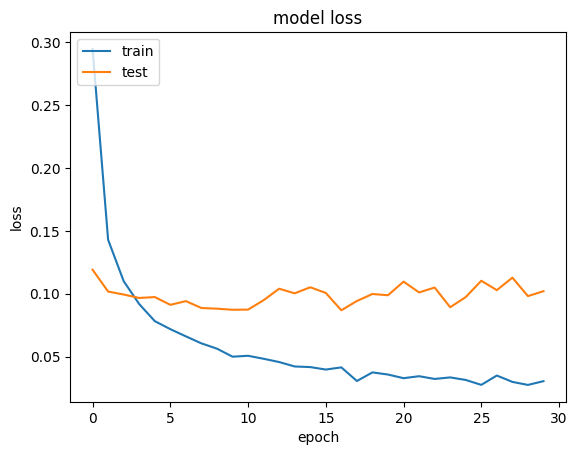

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
#evaluate the model
test_loss, test_acc = model_6.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0907 - accuracy: 0.9843
Test accuracy: 0.9843000173568726


In [50]:
model_6.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f4a527f40a0>>

In [51]:
model_6.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[ 0.00094154, -0.01515641, -0.02972651, ...,  0.00745801,
          0.00217856,  0.03336954],
        [ 0.01684355, -0.01334452,  0.02341327, ...,  0.00045366,
         -0.05476785, -0.01776094],
        [-0.03538051, -0.00241234,  0.04230834, ...,  0.02218446,
         -0.04936872,  0.04806117],
        ...,
        [-0.01393667,  0.03157569,  0.0678267 , ..., -0.04086497,
         -0.00743273,  0.01546323],
        [ 0.06647201, -0.03906087,  0.0476206 , ..., -0.05211779,
         -0.03574268, -0.04346916],
        [ 0.00840487, -0.05603835,  0.0375305 , ..., -0.04612091,
         -0.05418804, -0.01901898]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(512,) dtype=float32, numpy=
 array([-1.42476812e-01, -1.02164179e-01, -1.47957250e-01,  1.47395404e-02,
        -1.68774724e-01, -6.09855838e-02, -7.73131549e-02, -1.98841803e-02,
        -1.57261521e-01, -1.29442453e-01, -1.55589858e-03, 

In [52]:
model_6.get_config()

{'name': 'sequential_4',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_4',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.3,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_2',
    'trainable': True,
